# 1.A Geçmiş Depremler Zaman-Büyüklük Analizi ve Görselleştirilmesi

## Veri Kaynakları
* Türkiye Tarihsel Depremler: Afad (HTML)

## Anlatı Kaynakları

### 1.1.a Dünya Zaman-Büyüklük Grafiği

In [45]:
import pandas
import numpy

In [46]:
# Earthquakes near Turkey
ent = pandas.read_csv("../Data/TarihselDepremlerEdited.csv", sep="|")

In [47]:
ent.head()

Milad   Yıl  Ay  Gün  Saat  Dakika Vakit  Enlem  Boylam         Yer  \
0   M.Ö  2100 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
1   M.Ö  1890 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
2   M.Ö  1750 NaN  NaN   NaN     NaN   NaN   35.0    25.0       Girit   
3   M.Ö  1650 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
4   M.Ö  1570 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   

  Büyüklük Açıklama  
0        X      NaN  
1        X      NaN  
2        X      NaN  
3        X      NaN  
4        X      NaN

In [48]:
# Milattan önce olanları grafikte gösterebilmek için 
# M.Ö yazanları bir pandas serisine aldım.
# 
# Bu seriyi map işleminde kullanacağım. 
bc_series = ent.loc[ent["Milad"] == "M.Ö"]["Milad"]

In [49]:

# Milattan önce olan kayıtları -1 ile çarpıyorum.
# Muhtemelen bunu DF sorguları ile de yapabiliyorduk.
# Araştırmama rağmen bulamadım.
for i in range(len(bc_series)):
    ent.at[i, "Yıl"] = ent["Yıl"][i] * -1

In [50]:
ent.head()

Milad   Yıl  Ay  Gün  Saat  Dakika Vakit  Enlem  Boylam         Yer  \
0   M.Ö -2100 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
1   M.Ö -1890 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
2   M.Ö -1750 NaN  NaN   NaN     NaN   NaN   35.0    25.0       Girit   
3   M.Ö -1650 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
4   M.Ö -1570 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   

  Büyüklük Açıklama  
0        X      NaN  
1        X      NaN  
2        X      NaN  
3        X      NaN  
4        X      NaN

In [51]:
romen_dict = {
    "I": 1,
    "II": 2,
    "III": 3,
    "IV": 4,
    "V": 5,
    "VI": 6,
    "VII": 7,
    "VIII": 8,
    "IX": 9,
    "X": 10,
    "XI": 11,
    "XII": 12,
    "XIII": 13
}

In [52]:
# Büyüklük kolonunu Romen rakamlarından
# Float sayılara dönüştürdüm
ent["Büyüklük"] = ent["Büyüklük"].apply(lambda x: romen_dict[x] if not pandas.isnull(x) else numpy.nan)

In [53]:
ent.head()

Milad   Yıl  Ay  Gün  Saat  Dakika Vakit  Enlem  Boylam         Yer  \
0   M.Ö -2100 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
1   M.Ö -1890 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
2   M.Ö -1750 NaN  NaN   NaN     NaN   NaN   35.0    25.0       Girit   
3   M.Ö -1650 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   
4   M.Ö -1570 NaN  NaN   NaN     NaN   NaN   36.0    26.0  Doğu Girit   

   Büyüklük Açıklama  
0      10.0      NaN  
1      10.0      NaN  
2      10.0      NaN  
3      10.0      NaN  
4      10.0      NaN

In [54]:
dropped = ent.dropna(subset=["Yıl", "Büyüklük"])

Text(0, 0.5, 'Şiddet')

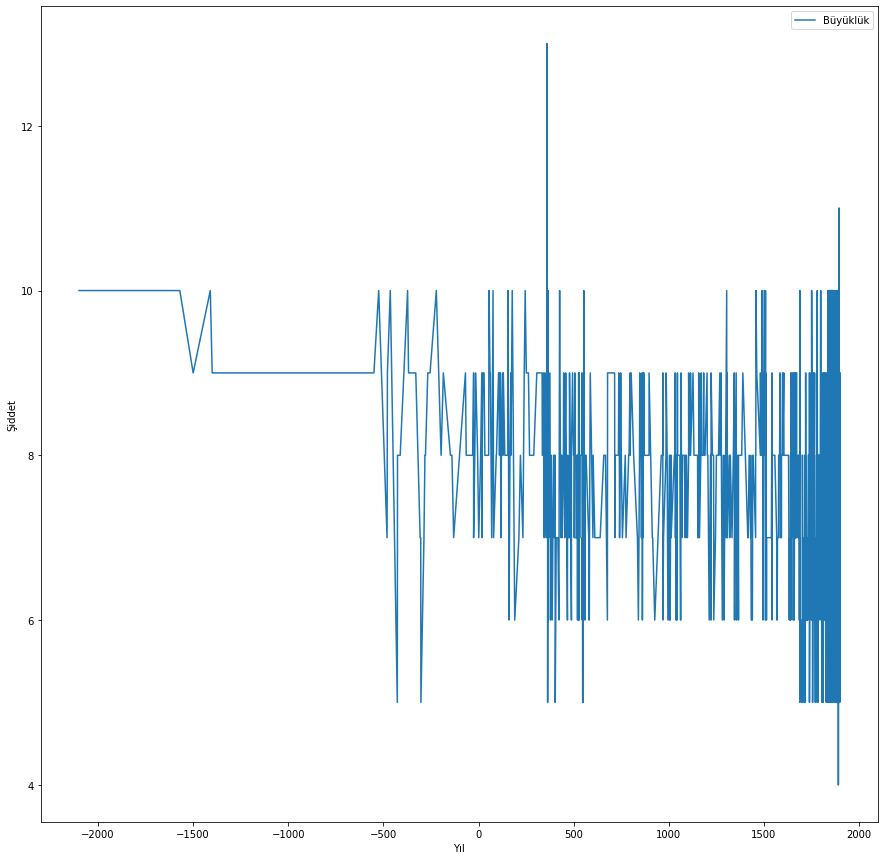

In [55]:
dropped.plot(x="Yıl", y="Büyüklük", figsize=(15,15)).set_ylabel("Şiddet")

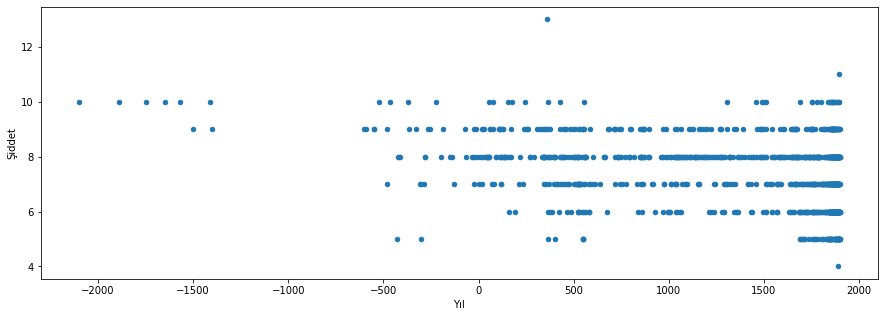

In [56]:
fig2 = dropped.plot.scatter(x="Yıl", y="Büyüklük", figsize=(15,5)).set_ylabel("Şiddet")

In [57]:
ent_ist = dropped[(dropped["Enlem"] >= 40.25) & (dropped["Enlem"] <= 42) & (dropped["Boylam"] >= 27) & (dropped["Boylam"] <= 31)]

In [58]:
ent_ist.shape

(161, 12)

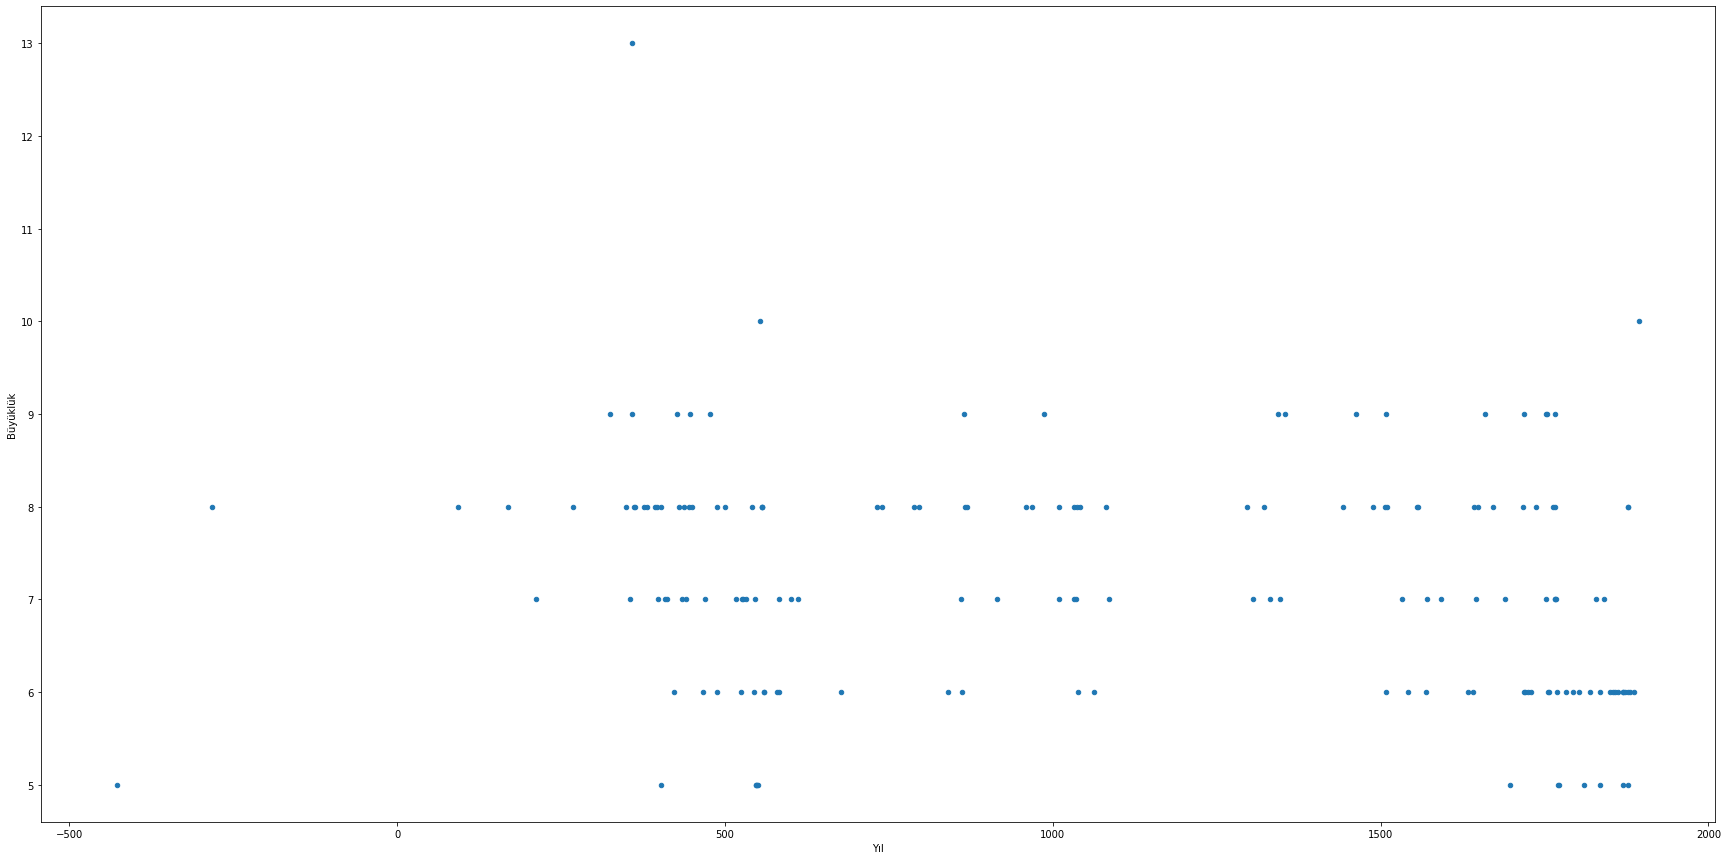

In [59]:
ent_ist.plot.scatter(x="Yıl", y="Büyüklük", figsize=(30,15))

In [60]:
ent_ist = ent_ist[(ent_ist["Yıl"] >= 0) ]
ent_ist[ent_ist["Yıl"] == 1864]

Empty DataFrame
Columns: [Milad, Yıl, Ay, Gün, Saat, Dakika, Vakit, Enlem, Boylam, Yer, Büyüklük, Açıklama]
Index: []

ent_ist.plot.scatter(x="Yıl", y="Büyüklük", figsize=(15,3))

In [61]:
ent_ist = ent_ist[(ent_ist["Yıl"] >= 0)]
g_ent = ent_ist.groupby("Yıl")["Büyüklük"].max()

In [62]:
gc_ent_count = []

In [63]:
for i in range(0, 1900, 100):
    gc_ent_count.append(g_ent[(g_ent.index > i) & (g_ent.index < i+100)].count())
    
gc_ent = pandas.Series(gc_ent_count, index=range(0,1900,100))

TypeError: set_ylabel() missing 1 required positional argument: 'ylabel'

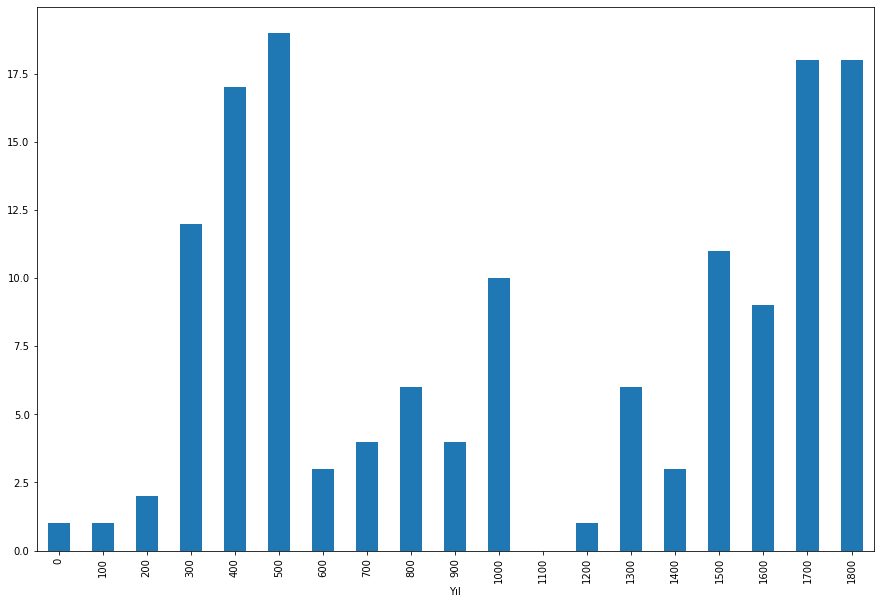

In [64]:
a = gc_ent.plot.bar(figsize=(15,10))
a.set_xlabel("Yıl")
a.set_ylabel()

In [ ]:
import geopandas

In [ ]:
turkey_map = geopandas.read_file("../shp/tur_adm1.shp")

In [ ]:
ist_map = turkey_map.cx[27:31, 40.25:42]

In [ ]:
ist_map.plot(figsize=(15,15))

In [ ]:
geo_ent_ist = geopandas.GeoDataFrame(dropped,
                                    geometry=geopandas.points_from_xy(dropped["Boylam"], dropped["Enlem"]))
geo_ent_ist = geo_ent_ist.cx[25:45, 35:42.5]

In [70]:
from shapely.geometry import Point
#geo_ent_ist.loc[896, "geometry"] = Point(40.2, 27.8)
geo_ent_ist["Büyüklük"]

0       10.0
1       10.0
2       10.0
3       10.0
4       10.0
        ... 
1165     6.0
1166     9.0
1167     8.0
1168     6.0
896      NaN
Name: Büyüklük, Length: 808, dtype: float64

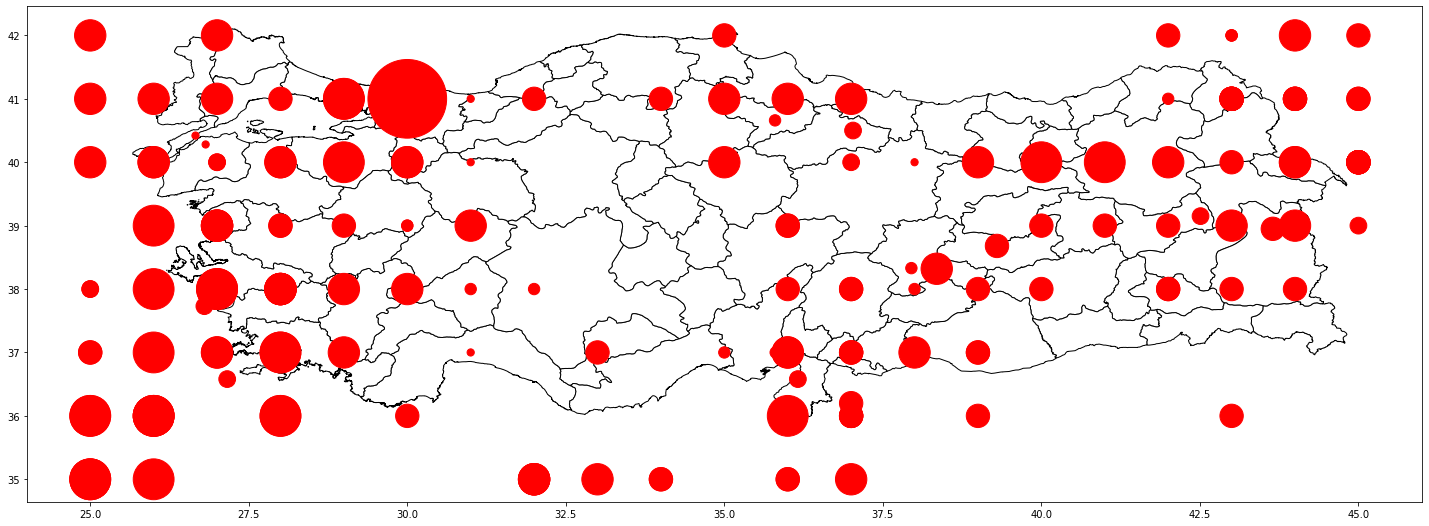

In [79]:
geo_ent_ist.plot(ax=turkey_map.plot(figsize=(25,25), color="white", edgecolor="black"), color="red", markersize=geo_ent_ist["Büyüklük"]**5/60)